In [ ]:
pip install pyLDAvis

In [56]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
import numpy as np
import math
from wordcloud import WordCloud


In [52]:
wordList = ['cannabis','marijuana','bammer','BC bud','blunt','bomb','bone','boo','boo-yah','bubonic chronic','bud','buddha','burger','Cali','candle','cheeba','chiba','chief','chiefs','chino','choke','chronic','cigga-weed','cigweed','clickem','colitas','combustible herbage','crippy','cronick','dank',"Devil's lettuce",' the','dirt weed','ditch weed','doja','dolja','doob','doober','doobie','dope','drat','draw','dro','dub','dube','Dutchie','endo','erve','fatty','fatty boom blatty','gange','ganja','ganje','giggle stick','gonj','grass','green','green bud','heim','herb','herbal refreshment','hippie lettuce','hog leg','hooter','hydro','indica','indo','j','jay','jib','joint','keef','kief','kill','kind bud','la la','left-handed cigarette','limbo','loud','Mary Jane','Mexican dirt weed','mighty mez','MJ','mota','Mr. J','nib','nugget','onion','paca lolo','pakaloco','pakalolo','pato','pot','purp','reefer','reggie','reggs','roach','schwag','shake','shwag','sinse','sinsemilla','skater','skunk weed','smoke','spliff','spliffy','sticky icky icky','sweet','tea',
'Thai stick','tical','toke','treats','trees','tunechi','tweed','wacky tobaccy','weed','whifty','woolies','zombie/20','4:20','bake','bake-out','blaze','boge','bug out','bun',
'celebrate 4-20','chief','chief out','choke','chokker','crossfade','dirp','ent','fire it up','get blazed','get high','get right','go up to bat','green','hotbox','load a fat one',
'MacGyver smoker','poke smot','puff','puff',' puff',' give','pull bong','session','shotgun','smoke','smoke dope','smoke out','smoke pot','smoke up','spark','spark it up','spark up',
'tea time','toke','toke up','torch up','wake and bake','baked','blazed','blitzed','blown','blown out','blunted','bread','burned','caned','carmelyzed','crossfade','crunched','crunk','dankrupt','faded','flame-broiled','geeked','high','high as a kite','hurt','in like Flint','keyed','krunked','lifted','lit','lit up','low','munchies','on the choongs',
"out of (one's) element",'pot-head','red','ripped','sketch','skunt','sloppy','smoked','stoned','strunk','stuck','tall','zoned', 'ATMed','bat','batty','bong','bowl','cashed','chillum','chipper','dug out','head shop','one hitter','oney bat','piece','pinch hitter','pinchie','roach clip','sploof','spoof','toke']

In [ ]:
tweets = []
df=[]

In [ ]:
for word in wordList :
    dates = ' lang:en until:2022-10-15 since:2022-04-15 -filter:replies'
    query = str(word) + dates
    print(query)
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if len(tweets) > 10000:
            break
        else:
            tweets.append([tweet.date,tweet.user.username,tweet.content,tweet.hashtags,tweet.user.location])
df = pd.DataFrame(tweets,columns = ['Date','User','Tweet','Hashtags','Location'])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
csv_data = df.to_csv('data.csv', index = True)

In [57]:
tweet_df = pd.read_csv('data1.csv')
tweet_df.head()

,Date,User,Tweet,Hashtags,Location
0,2022-10-14 23:59:49+00:00,ShadAhmadKhan5,SHE IS MY WIFE MEHWISH Cannabis Smoker https:/...,NaN,NaN
1,2022-10-14 23:58:12+00:00,EvEnergy2030,"Aurora Cannabis Inc. $ACB Stock Rose Thursday,...",NaN,"Seattle, Washington"
2,2022-10-14 23:57:07+00:00,TempleGrower,Some absolutely CAKED Fuel D.OG from @Seedsman...,"['GrowYourOwn', 'Cannabis']",Treaty 6 Territory
3,2022-10-14 23:56:48+00:00,MMPconnection,#cannabiscommunity #marijuana #cannabis Alarmi...,"['cannabiscommunity', 'marijuana', 'cannabis']",NaN
4,2022-10-14 23:56:47+00:00,MMPconnection,#cannabiscommunity #marijuana #cannabis Campai...,"['cannabiscommunity', 'marijuana', 'cannabis']",NaN


In [58]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      10001 non-null  object
 1   User      10001 non-null  object
 2   Tweet     10001 non-null  object
 3   Hashtags  4638 non-null   object
 4   Location  7301 non-null   object
dtypes: object(5)
memory usage: 390.8+ KB


In [62]:
tweet_df["Location"].fillna("No Location", inplace = True)
tweet_df["Hashtags"].fillna("No Hashtag", inplace = True)

In [63]:

tweet_df.head()

,Date,User,Tweet,Hashtags,Location
0,2022-10-14 23:59:49+00:00,ShadAhmadKhan5,SHE IS MY WIFE MEHWISH Cannabis Smoker https:/...,No Hashtag,No Location
1,2022-10-14 23:58:12+00:00,EvEnergy2030,"Aurora Cannabis Inc. $ACB Stock Rose Thursday,...",No Hashtag,"Seattle, Washington"
2,2022-10-14 23:57:07+00:00,TempleGrower,Some absolutely CAKED Fuel D.OG from @Seedsman...,"['GrowYourOwn', 'Cannabis']",Treaty 6 Territory
3,2022-10-14 23:56:48+00:00,MMPconnection,#cannabiscommunity #marijuana #cannabis Alarmi...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location
4,2022-10-14 23:56:47+00:00,MMPconnection,#cannabiscommunity #marijuana #cannabis Campai...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location


In [64]:
#function to extract hashtags from text
def hashtag_extract(x):
    # @x : text parameter to the function 
    hashtags = []
    for i in x:
        # re for finding hashtags
        ht = re.findall(r"#(\w+)", i)
        # storing hashtags in list
        hashtags.append(ht)
    # returns hashtags from the function
    return hashtags

In [65]:
#storing the hashtags in list
hashtags_text = hashtag_extract(tweet_df['Tweet'])

In [66]:
# getting sum of the hashtags
hashtags_text = sum(hashtags_text,[])

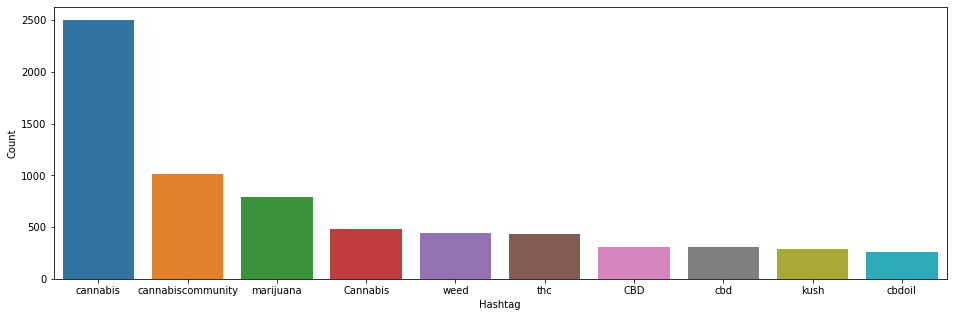

In [67]:
a = nltk.FreqDist(hashtags_text)
n_largest_hashtags = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
n_largest_hashtags = n_largest_hashtags.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=n_largest_hashtags, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [68]:
def remove_url(text):
    """
    Removes the url from the text which is essential
    step for data preprocessing
    @ param text: twitter text
    """
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'',text)
tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda text:remove_url(text))

In [69]:
tweet_df['Tweet']

0                  SHE IS MY WIFE MEHWISH Cannabis Smoker 
1        Aurora Cannabis Inc. $ACB Stock Rose Thursday,...
2        Some absolutely CAKED Fuel D.OG from @Seedsman...
3        #cannabiscommunity #marijuana #cannabis Alarmi...
4        #cannabiscommunity #marijuana #cannabis Campai...
                               ...                        
9996     I must confess the Animal Justice Party are my...
9997     You can watch todays show on #YouTube with the...
9998     Team 2: another proactive stop in Bordesley Gr...
9999     Ricky Williams talks Mike Ditka, his "interest...
10000    The Virtuoso Recycler Bong\n\n\n\n#bong #bongs...
Name: Tweet, Length: 10001, dtype: object

In [70]:
def remove_hashtag(text):
    """
    Function to remove the #hastag of users from the text.
    #hashtags are not useful information in nlp and hence it is good 
    practice to remove them during data preprocessing
    
    @ param text: twitter text
    It subtitutes the #hashtags with empty string
    """
    regular = re.findall(r'#[\w]*',text)
    for mentions in regular:
        text = re.sub(mentions,"",text)
    return text

In [71]:
#applying the function to remove @users from whole column
tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda text:remove_hashtag(str(text)))

In [72]:
#function to extract mentions from text
def mentions(x):
    # @x : text parameter to the function 
    mentions = []
    for i in x:
        # re for finding mentions
        ht = re.findall(r'@[\w]*', i)
        # storing hashtags in list
        mentions.append(ht)
    # returns mentions from the function
    return mentions

In [73]:
#storing the mentions in list
mentions = mentions(tweet_df['Tweet'])

In [74]:
# getting sum of the mentions
mentions = sum(mentions,[])

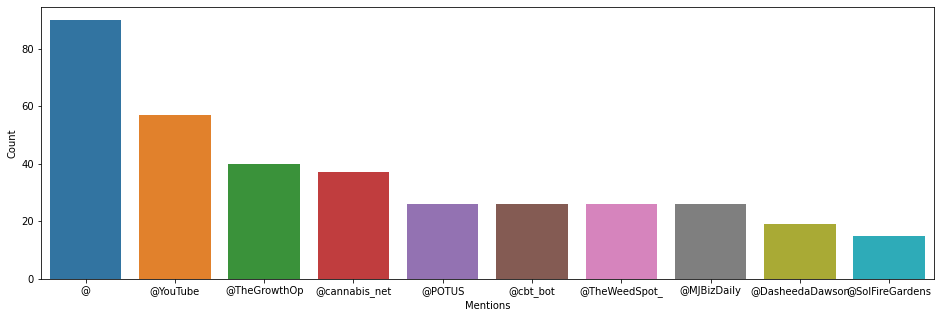

In [76]:
a = nltk.FreqDist(mentions)
n_largest_mentions = pd.DataFrame({'Mentions': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
n_largest_mentions = n_largest_mentions.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=n_largest_mentions, x= "Mentions", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [77]:
n_largest_mentions

,Mentions,Count
28,@,90
7,@YouTube,57
211,@TheGrowthOp,40
191,@cannabis_net,37
101,@POTUS,26
172,@cbt_bot,26
173,@TheWeedSpot_,26
179,@MJBizDaily,26
106,@DasheedaDawson,19
15,@SolFireGardens,15


In [78]:
def remove_rt(text):
    """
    Function to remove the Retweet of users from the text.
    Retweets are not useful information in nlp and hence it is good 
    practice to remove them during data preprocessing
    
    @ param text: twitter text
    It subtitutes the RT with empty string
    """
    regular = re.findall(r'^[Rr][Tt]',text)
    for mentions in regular:
        text = re.sub(mentions,"",text)
    return text

In [79]:
# removing Rt from column
tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda text:remove_rt(text))

In [80]:
tweet_df['Tweet']

0                  SHE IS MY WIFE MEHWISH Cannabis Smoker 
1        Aurora Cannabis Inc. $ACB Stock Rose Thursday,...
2        Some absolutely CAKED Fuel D.OG from @Seedsman...
3           Alarming Rise in Hospital Borne Infections ...
4           Campaign 2022: Andersen vows to end marijua...
                               ...                        
9996     I must confess the Animal Justice Party are my...
9997     You can watch todays show on  with the link be...
9998     Team 2: another proactive stop in Bordesley Gr...
9999     Ricky Williams talks Mike Ditka, his "interest...
10000    The Virtuoso Recycler Bong\n\n\n\n shop  thing...
Name: Tweet, Length: 10001, dtype: object

In [81]:
#Converting the text of column to lower case
tweet_df['Tweet'] = tweet_df['Tweet'].str.lower()

In [82]:
tweet_df

,Date,User,Tweet,Hashtags,Location
0,2022-10-14 23:59:49+00:00,ShadAhmadKhan5,she is my wife mehwish cannabis smoker,No Hashtag,No Location
1,2022-10-14 23:58:12+00:00,EvEnergy2030,"aurora cannabis inc. $acb stock rose thursday,...",No Hashtag,"Seattle, Washington"
2,2022-10-14 23:57:07+00:00,TempleGrower,some absolutely caked fuel d.og from @seedsman...,"['GrowYourOwn', 'Cannabis']",Treaty 6 Territory
3,2022-10-14 23:56:48+00:00,MMPconnection,alarming rise in hospital borne infections ...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location
4,2022-10-14 23:56:47+00:00,MMPconnection,campaign 2022: andersen vows to end marijua...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location
...,...,...,...,...,...
9996,2022-10-12 23:52:16+00:00,SuDharmapala,i must confess the animal justice party are my...,No Hashtag,"Melbourne, Victoria"
9997,2022-10-12 23:51:37+00:00,highat9news,you can watch todays show on with the link be...,"['YouTube', 'ElonMusk', 'BarcaInter', 'Champio...","Los Angeles, CA"
9998,2022-10-12 23:51:05+00:00,BE_NTF,team 2: another proactive stop in bordesley gr...,No Hashtag,B'ham East Local Policing Unit
9999,2022-10-12 23:51:01+00:00,BearsViews,"ricky williams talks mike ditka, his ""interest...","['BearsFootball', 'BearsTalk', 'DaBears', 'Bea...",No Location


In [83]:
punctuations = string.punctuation

def remove_punctuation(text): 
    """
    Function to remove the punctuations  from the text.    
    @ param text: twitter text
    It subtitutes the RT with empty string
    """
    return text.translate(str.maketrans('','',punctuations))
#removing punctuations from the column
tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda text:remove_punctuation(text))

In [84]:
tweet_df['Tweet']

0                  she is my wife mehwish cannabis smoker 
1        aurora cannabis inc acb stock rose thursday ou...
2        some absolutely caked fuel dog from seedsmanse...
3           alarming rise in hospital borne infections ...
4           campaign 2022 andersen vows to end marijuan...
                               ...                        
9996     i must confess the animal justice party are my...
9997     you can watch todays show on  with the link be...
9998     team 2 another proactive stop in bordesley gre...
9999     ricky williams talks mike ditka his interestin...
10000    the virtuoso recycler bong\n\n\n\n shop  thing...
Name: Tweet, Length: 10001, dtype: object

In [85]:
#replacing digits with empty string
tweet_df['Tweet'] = tweet_df['Tweet'].str.replace('\d+', '')
#replacing \n with empty string
tweet_df['Tweet'] = tweet_df['Tweet'].str.replace('\\n+', '')
#removing emojis from the column
tweet_df['Tweet'] = tweet_df['Tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

<>:2: DeprecationWarning: invalid escape sequence \d
<>:6: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \d
<>:6: DeprecationWarning: invalid escape sequence \w
/var/folders/ff/v5b12v310hb00xbbrrld12lh0000gn/T/ipykernel_1508/807632372.py:2: DeprecationWarning: invalid escape sequence \d
  tweet_df['Tweet'] = tweet_df['Tweet'].str.replace('\d+', '')
/var/folders/ff/v5b12v310hb00xbbrrld12lh0000gn/T/ipykernel_1508/807632372.py:6: DeprecationWarning: invalid escape sequence \w
  tweet_df['Tweet'] = tweet_df['Tweet'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
/var/folders/ff/v5b12v310hb00xbbrrld12lh0000gn/T/ipykernel_1508/807632372.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['Tweet'] = tweet_df['Tweet'].str.replace('\d+', '')
/var/folders/ff/v5b12v310hb00xbbrrld12lh0000gn/T/ipykernel_1508/807632372.py:4: FutureWarning: The default value of regex will change from T

In [86]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [87]:
stop = list(stopwords.words('english'))
def removal_stopwords(text):
    #function to remove stopwords from the text
    return " ".join([w for w in str(text).split() if w not in stop])
#removing stopwords from the column
tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda text:removal_stopwords(text))

In [88]:
tweet_df.head()

,Date,User,Tweet,Hashtags,Location
0,2022-10-14 23:59:49+00:00,ShadAhmadKhan5,wife mehwish cannabis smoker,No Hashtag,No Location
1,2022-10-14 23:58:12+00:00,EvEnergy2030,aurora cannabis inc acb stock rose thursday ou...,No Hashtag,"Seattle, Washington"
2,2022-10-14 23:57:07+00:00,TempleGrower,absolutely caked fuel dog seedsmanseeds least ...,"['GrowYourOwn', 'Cannabis']",Treaty 6 Territory
3,2022-10-14 23:56:48+00:00,MMPconnection,alarming rise hospital borne infections unders...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location
4,2022-10-14 23:56:47+00:00,MMPconnection,campaign andersen vows end marijuana possessio...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location


In [89]:
# tokenize the text of sentence
tokenized = tweet_df['Tweet'].apply(lambda x:x.split()) 
tokenized.head()

0                    [wife, mehwish, cannabis, smoker]
1    [aurora, cannabis, inc, acb, stock, rose, thur...
2    [absolutely, caked, fuel, dog, seedsmanseeds, ...
3    [alarming, rise, hospital, borne, infections, ...
4    [campaign, andersen, vows, end, marijuana, pos...
Name: Tweet, dtype: object

In [90]:
# applying stemming on tokened list and combine them
from nltk import PorterStemmer
port = PorterStemmer()
tokenized = tokenized.apply(lambda x:[port.stem(i) for i in x])
for i in range(len(tokenized)):
    tokenized[i] = ' '.join(tokenized[i])
tweet_df['Tweet'] = tokenized


In [91]:
tweet_df.head()

,Date,User,Tweet,Hashtags,Location
0,2022-10-14 23:59:49+00:00,ShadAhmadKhan5,wife mehwish cannabi smoker,No Hashtag,No Location
1,2022-10-14 23:58:12+00:00,EvEnergy2030,aurora cannabi inc acb stock rose thursday out...,No Hashtag,"Seattle, Washington"
2,2022-10-14 23:57:07+00:00,TempleGrower,absolut cake fuel dog seedsmanse least fuelli ...,"['GrowYourOwn', 'Cannabis']",Treaty 6 Territory
3,2022-10-14 23:56:48+00:00,MMPconnection,alarm rise hospit born infect underscor applic...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location
4,2022-10-14 23:56:47+00:00,MMPconnection,campaign andersen vow end marijuana possess pr...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location


In [92]:
#import vader sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment_intensity = SentimentIntensityAnalyzer()

In [93]:
#applying scores 
tweet_df['vader_scores'] = tweet_df['Tweet'].apply(lambda tweet: sentiment_intensity.polarity_scores(tweet))
tweet_df.head()

,Date,User,Tweet,Hashtags,Location,vader_scores
0,2022-10-14 23:59:49+00:00,ShadAhmadKhan5,wife mehwish cannabi smoker,No Hashtag,No Location,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2022-10-14 23:58:12+00:00,EvEnergy2030,aurora cannabi inc acb stock rose thursday out...,No Hashtag,"Seattle, Washington","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-10-14 23:57:07+00:00,TempleGrower,absolut cake fuel dog seedsmanse least fuelli ...,"['GrowYourOwn', 'Cannabis']",Treaty 6 Territory,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp..."
3,2022-10-14 23:56:48+00:00,MMPconnection,alarm rise hospit born infect underscor applic...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location,"{'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'comp..."
4,2022-10-14 23:56:47+00:00,MMPconnection,campaign andersen vow end marijuana possess pr...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [94]:
tweet_df['compound_scores_vader']  = tweet_df['vader_scores'].apply(lambda vader_score_dict: vader_score_dict['compound'])
tweet_df.head()

,Date,User,Tweet,Hashtags,Location,vader_scores,compound_scores_vader
0,2022-10-14 23:59:49+00:00,ShadAhmadKhan5,wife mehwish cannabi smoker,No Hashtag,No Location,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2022-10-14 23:58:12+00:00,EvEnergy2030,aurora cannabi inc acb stock rose thursday out...,No Hashtag,"Seattle, Washington","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2022-10-14 23:57:07+00:00,TempleGrower,absolut cake fuel dog seedsmanse least fuelli ...,"['GrowYourOwn', 'Cannabis']",Treaty 6 Territory,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.8126
3,2022-10-14 23:56:48+00:00,MMPconnection,alarm rise hospit born infect underscor applic...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location,"{'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'comp...",-0.3400
4,2022-10-14 23:56:47+00:00,MMPconnection,campaign andersen vow end marijuana possess pr...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [95]:
 #function to classify sentiment based upon values
def format_output(output_dict):
    polarity = "Neutral"
    if(output_dict['compound']>= 0.05):
        polarity = "Positive"
    elif(output_dict['compound']<= -0.05):
        polarity = "Negative"
    return polarity
def predict_sentiment(text): 
    output_dict =  sentiment_intensity.polarity_scores(text)
    return format_output(output_dict)
# Run the predictions
tweet_df["vader_prediction"] = tweet_df["Tweet"].apply(predict_sentiment)

In [96]:
tweet_df.head()

,Date,User,Tweet,Hashtags,Location,vader_scores,compound_scores_vader,vader_prediction
0,2022-10-14 23:59:49+00:00,ShadAhmadKhan5,wife mehwish cannabi smoker,No Hashtag,No Location,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,2022-10-14 23:58:12+00:00,EvEnergy2030,aurora cannabi inc acb stock rose thursday out...,No Hashtag,"Seattle, Washington","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,2022-10-14 23:57:07+00:00,TempleGrower,absolut cake fuel dog seedsmanse least fuelli ...,"['GrowYourOwn', 'Cannabis']",Treaty 6 Territory,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.8126,Positive
3,2022-10-14 23:56:48+00:00,MMPconnection,alarm rise hospit born infect underscor applic...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location,"{'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'comp...",-0.3400,Negative
4,2022-10-14 23:56:47+00:00,MMPconnection,campaign andersen vow end marijuana possess pr...,"['cannabiscommunity', 'marijuana', 'cannabis']",No Location,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


<AxesSubplot:xlabel='vader_prediction', ylabel='count'>

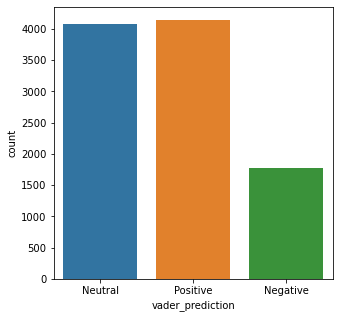

In [97]:
#plotting distribution of sentiments using vader
import seaborn as sns
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(5,5))
sns.countplot(x='vader_prediction',data=tweet_df)

In [101]:
#
# LDA parameters
#

# number of topics to discover (default = 10)
topicNum = 10
# maximum number of words to display per topic (default = 10)
# Answer to Exercise 1 (change from 10 to 15)
wordNumToDisplay = 15
# this is the number of features/words to used to describe our documents
# please feel free to change to see effect
featureNum = 1500

In [102]:
"""
Performs counting via CountVectorizer and then apply the LDA model.
"""

#
# Count Vectorizer
#

tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(tweet_df['Tweet'])
# extract the names of the features (in our case, the words)
tfFeatureNames = tfVectorizer.get_feature_names_out()


#
# LDA MODEL
#

# Run LDA (see documentation about what the arguments means)
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

In [103]:
def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [104]:

display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
cannabi delta thc citi look best great way want pot legalis price gummi cultur meet
Topic 1:
cannabi day time join brand vape launch love studi industri follow th high economi friend
Topic 2:
cbd cannabi oil peopl polic gummi arrest man life help consum commun natur home bring
Topic 3:
cannabi legal like im good today weed make know work state octob dont year strain
Topic 4:
cannabi amp market product stock thank store visit buy think share ask issu list growth
Topic 5:
cannabi marijuana biden legal pardon commun seed feder support presid possess come right plan approv
Topic 6:
cannabi open oper cultiv board search effort test gt job hold counti compani famili member
Topic 7:
new cannabi york dispensari read link medic vote articl licens nyc equiti elect research council
Topic 8:
cannabi busi industri drug amp medic news regul smoke retail hemp market use talk report
Topic 9:
cannabi use state need marijuana sale grow illeg medic say peopl legal plant farm program


In [105]:

panel = pyLDAvis.sklearn.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

/Users/sunny/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/sunny/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/sunny/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/sunny/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative use

In [106]:
def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """

    # this normalises each row/topic to sum to one
    # use this normalisedComponents to display your wordclouds
    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]

    
    topicNum = len(model.components_)
    # number of wordclouds for each row
    plotColNum = 3
    # number of wordclouds for each column
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

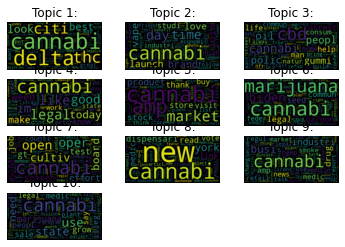

In [108]:

displayWordcloud(ldaModel, tfFeatureNames)
